In [1]:
## AUTHOR MIQUÉIAS FERNANDES
## bio@mikeias.net
## 02/21

In [2]:
import pandas as pd
import seaborn as sns

from math import log
from matplotlib import rc

In [3]:
TITLE_SIZE = 20
LABEL_SIZE = 20
NOTE_SIZE = 20
rc('text', usetex=True)

In [21]:
rc = {'lines.linewidth': 2, 
      'axes.labelsize': LABEL_SIZE, 
      'axes.titlesize': TITLE_SIZE, 
      'legend.fontsize': 'x-large',
      'font.family':'lato', 'font.serif':['lato'],
      'axes.facecolor': 'DFDFE5'}
sns.set_context('paper', rc=rc)
sns.set_style('dark', rc=rc)

In [22]:
def importEvents(file, lab, cols=['ID','Gene','FDR', 'PSI', 'Label']):
    data = pd.read_csv(file, delimiter='\t')
    data['Label'] = lab
    data['PSI'] = data['IncLevelDifference']
    data['Gene'] = data['GeneID']
    if not all([c in list(data.columns) for c in cols]): 
        raise Exception('Load Error in ' + file)
    return data.drop(columns=[c for c in data.columns if not c in cols])

In [23]:
def parseFolder(folder):
    a3ss = importEvents(folder + '/A3SS.MATS.JC.txt', 'A3SS')
    a5ss = importEvents(folder + '/A5SS.MATS.JC.txt', 'A5SS')
    ri = importEvents(folder + '/RI.MATS.JC.txt', 'RI')
    se = importEvents(folder + '/SE.MATS.JC.txt', 'SE')
    mxe = importEvents(folder + '/MXE.MATS.JC.txt', 'MXE')
    pd_all_data = pd.concat([a3ss, a5ss,  ri, se ,mxe])
    pd_all_data['qValue'] = pd_all_data.FDR.map(lambda e:  'ALL' if e > 0.05 else 'SIG')
    pd_all_data['log10fdr'] = pd_all_data.FDR.map(lambda e: -log(e, 10))
    return pd_all_data

In [24]:
gy, ry  = '../rmats401/resultadosGY/', '../rmats401/resultadosRY/'

In [25]:
gy_dt, ry_dt = parseFolder(gy), parseFolder(ry)

In [26]:
gy_dt_sig = gy_dt.loc[gy_dt.qValue == 'SIG']

In [27]:
g_sig = gy_dt_sig.loc[gy_dt_sig.PSI < 0]

In [28]:
yg_sig = gy_dt_sig.loc[gy_dt_sig.PSI > 0]

In [29]:
ry_dt_sig = ry_dt.loc[ry_dt.qValue == 'SIG']

In [30]:
r_sig = ry_dt_sig.loc[ry_dt_sig.PSI < 0]

In [31]:
yr_sig = ry_dt_sig.loc[ry_dt_sig.PSI > 0]

In [32]:
y_sig = pd.concat([yg_sig, yr_sig])

In [33]:
len(g_sig), len(y_sig), len(r_sig)

(70, 125, 47)

In [34]:
if not len(gy_dt_sig) + len(ry_dt_sig) == len(g_sig) + len(y_sig) + len(r_sig):
    raise Exception('Deu erro na hora de juntar, verifique!')

In [35]:
dt = []
for c, d in [('G', g_sig), ('Y', y_sig), ('R', r_sig)]:
    for evt in ['RI', 'SE', 'A3SS', 'A5SS', 'MXE']:
        genes = d.loc[d['Label'] == evt, 'Gene'].nunique()
        events = d.loc[d['Label'] == evt, 'ID'].nunique()
        dt.append([c, evt, "Genes", genes])
        dt.append([c, evt, "Events", events])

In [36]:
data = pd.DataFrame(dt, columns=["Condition", "Event", "Distinct count", "Count"])

findfont: Font family ['lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['lato'] not found. Falling back to DejaVu Sans.


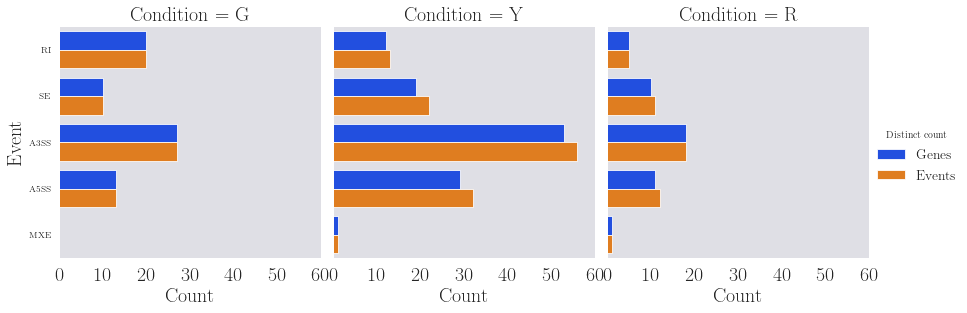

In [37]:
g = sns.catplot(
    x="Count", 
    y="Event",
    hue="Distinct count", 
    col="Condition", 
    data=data, height=4, kind='bar', palette="bright")

g.set_xticklabels(fontsize=20)

In [ ]:
g.savefig('bars.as.svg')

In [38]:
data

,Condition,Event,Distinct count,Count
0,G,RI,Genes,20
1,G,RI,Events,20
2,G,SE,Genes,10
3,G,SE,Events,10
4,G,A3SS,Genes,27
5,G,A3SS,Events,27
6,G,A5SS,Genes,13
7,G,A5SS,Events,13
8,G,MXE,Genes,0
9,G,MXE,Events,0


In [39]:
dt = []
for c, d in [('GY', gy_dt_sig), ('RY', gy_dt_sig)]:
    for evt in ['RI', 'SE', 'A3SS', 'A5SS', 'MXE']:
        genes = d.loc[d['Label'] == evt, 'Gene'].nunique()
        events = d.loc[d['Label'] == evt, 'ID'].nunique()
        dt.append([c, evt, "Genes", genes])
        dt.append([c, evt, "Events", events])

In [40]:
dt

[['GY', 'RI', 'Genes', 26],
 ['GY', 'RI', 'Events', 26],
 ['GY', 'SE', 'Genes', 22],
 ['GY', 'SE', 'Events', 22],
 ['GY', 'A3SS', 'Genes', 65],
 ['GY', 'A3SS', 'Events', 68],
 ['GY', 'A5SS', 'Genes', 33],
 ['GY', 'A5SS', 'Events', 34],
 ['GY', 'MXE', 'Genes', 0],
 ['GY', 'MXE', 'Events', 0],
 ['RY', 'RI', 'Genes', 26],
 ['RY', 'RI', 'Events', 26],
 ['RY', 'SE', 'Genes', 22],
 ['RY', 'SE', 'Events', 22],
 ['RY', 'A3SS', 'Genes', 65],
 ['RY', 'A3SS', 'Events', 68],
 ['RY', 'A5SS', 'Genes', 33],
 ['RY', 'A5SS', 'Events', 34],
 ['RY', 'MXE', 'Genes', 0],
 ['RY', 'MXE', 'Events', 0]]

In [41]:
data = pd.DataFrame(dt, columns=["Condition", "Event", "Distinct count", "Count"])

In [42]:
data

,Condition,Event,Distinct count,Count
0,GY,RI,Genes,26
1,GY,RI,Events,26
2,GY,SE,Genes,22
3,GY,SE,Events,22
4,GY,A3SS,Genes,65
5,GY,A3SS,Events,68
6,GY,A5SS,Genes,33
7,GY,A5SS,Events,34
8,GY,MXE,Genes,0
9,GY,MXE,Events,0


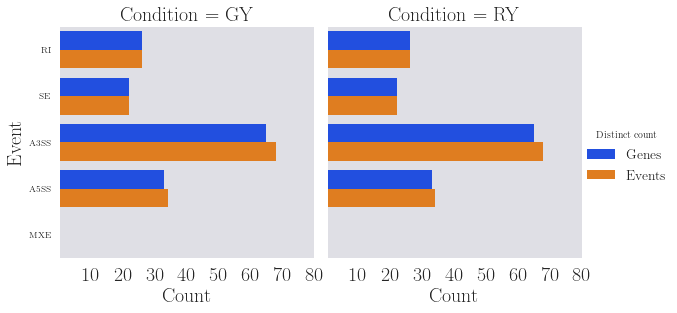

In [49]:
g = sns.catplot(
    x="Count", 
    y="Event",
    hue="Distinct count", 
    col="Condition", 
    data=data, height=4, kind='bar', palette="bright", linewidth=0)

g.set_xticklabels([10*i if i > 0 else "" for i in range(0,9)], fontsize=20)

In [50]:
g.savefig('bars.as.svg')